In [389]:
# This was given to us upon opening the competition code
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [390]:
# NumPy provides functionality for working with arrays and matrices in Python.
import numpy as np

# Pyplot provides functions for creating plots and visualizations in Python.
import matplotlib.pyplot as plt

# A magic command that enables Jupyter to display Matplotlib plots inline within the notebook.
%matplotlib inline

# Pandas provides functionality for working with data in tabular form.
import pandas as pd

# Seaborn provides additional functionality for creating statistical visualizations in Python.
import seaborn as sns

# Logistic regression is a statistical method for analyzing a dataset in which there are
# one or more independent variables that determine an outcome.
from sklearn.linear_model import LogisticRegression

# Support vector machines are a set of related supervised learning methods
# for classification and regression analysis.
from sklearn.svm import SVC

# Decision trees are a set of algorithms for solving classification and regression problems.
from sklearn.tree import DecisionTreeClassifier

# Gradient boosting is a machine learning technique for regression and classification problems
# which produces a prediction model in the form of an ensemble of weak prediction models.
from sklearn.ensemble import GradientBoostingClassifier

# Random forests are an ensemble learning method for classification, regression and other tasks 
# that operate by constructing a multitude of decision trees at training time.
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbors (KNN) is a non-parametric algorithm used for classification and regression tasks.
from sklearn.neighbors import KNeighborsClassifier

# This function is used to split a dataset into training and testing subsets for model evaluation.
from sklearn.model_selection import train_test_split

# is a function that performs an exhaustive search over specified parameter values for an estimator
# (a model) and returns the best set of parameters for the estimator, based on cross-validation performance.
from sklearn.model_selection import GridSearchCV

# This import ignores the warnings output by the compiler
import warnings
warnings.filterwarnings('ignore')

# print the classification report for your model's predictions.
from sklearn.metrics import classification_report

# Creates a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.
from sklearn.metrics import confusion_matrix

In [391]:
# Get the data from the files and set df_train to training data and df_test to the testing data.
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [392]:
# Print the head of the training data.
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


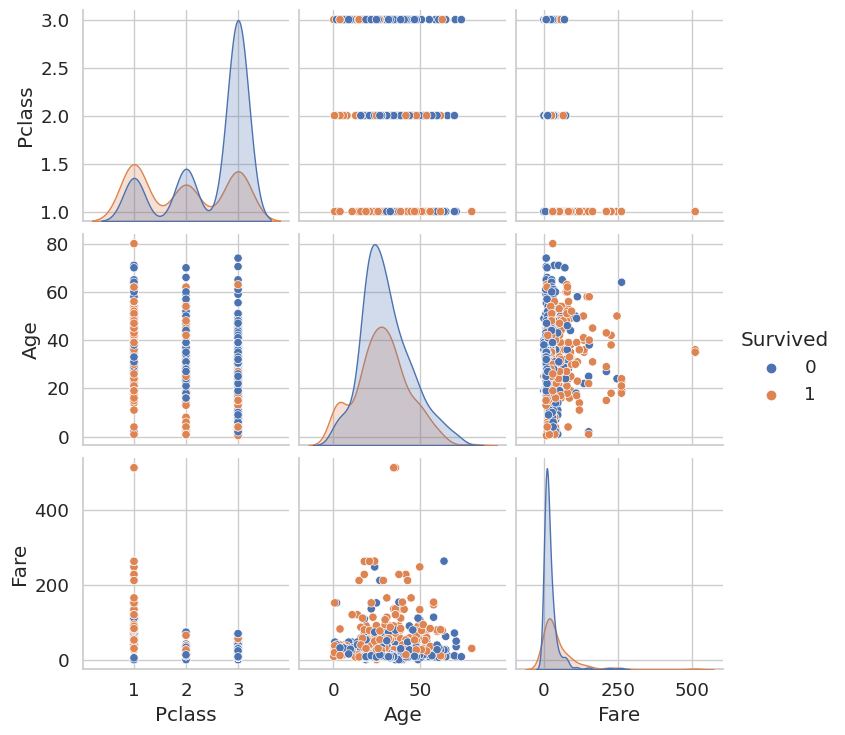

In [393]:
# The scatter plot matrix created using Seaborn's pairplot function is used to visualize
# the relationships and correlations between different attributes in the dataset. 
# The columns or attributes to be plotted are specified using the cols list. 
# The hue parameter is set to 'Survived' so that the data points are colored based
# on the 'Survived' values (0 for not surviving and 1 for survived) and the 
# relationship between the variables can be visualized in relation to survival. 
# This graph can be useful in identifying any correlations between the variables 
# and in identifying any patterns that may help in predicting survival.

# Define the columns to plot.
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

# Create the scatter plot matrix.
sns.pairplot(df_train[cols], hue='Survived')

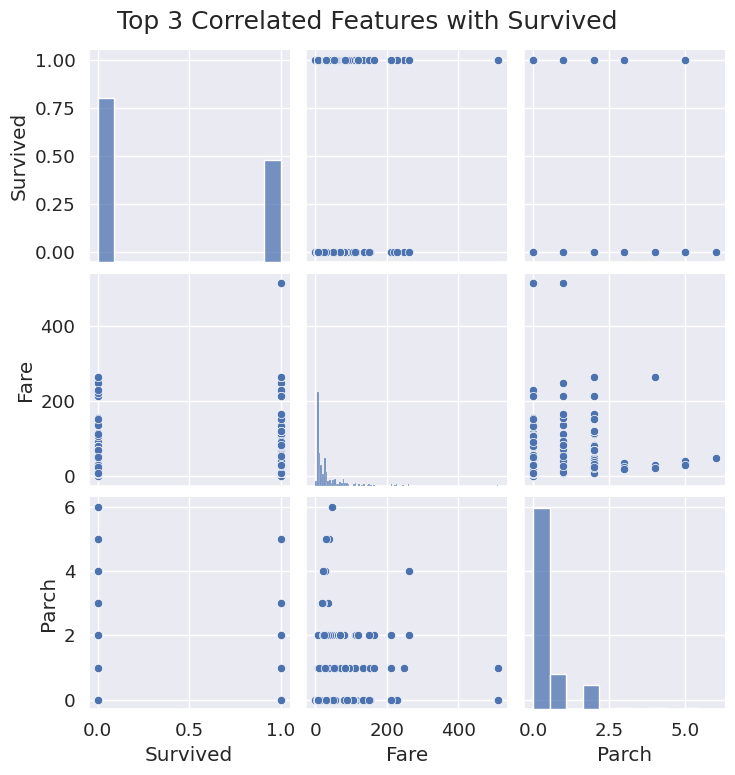

In [394]:
# The main purpose of this graph is to visualize the relationship between the top correlated features
# and the target variable. By examining the scatter plots, we can gain insights into how each 
# of these features relates to survival. For example, we may be able to see whether certain combinations
# of values for these features are more likely to result in survival or not.

# Set the number of top correlated features to plot.
n_features = 3
# Calculate correlation matrix for the features.
corr_matrix = df_train.corr()

# This line of code below finds the n_features number of features that are most highly correlated with the 
# Survived target variable by first creating a correlation matrix (corr_matrix) of all features in the dataset
# and then using the nlargest method to select the n_features number of features with the highest
# correlation values. The .index attribute is then used to extract the names of these
# top features and store them in the top_features variable.
top_features = corr_matrix.nlargest(n_features, 'Survived')['Survived'].index

# Set the style and font scale.
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

# Create a pair plot of the top correlated features.
sns.pairplot(data=df_train[top_features], height=2.5)

# Set the plot title and labels.
plt.suptitle(f"Top {n_features} Correlated Features with Survived", y=1.03, fontsize=18)
plt.xlabel("Features")
plt.ylabel("Features")

# Display the plot.
plt.show()

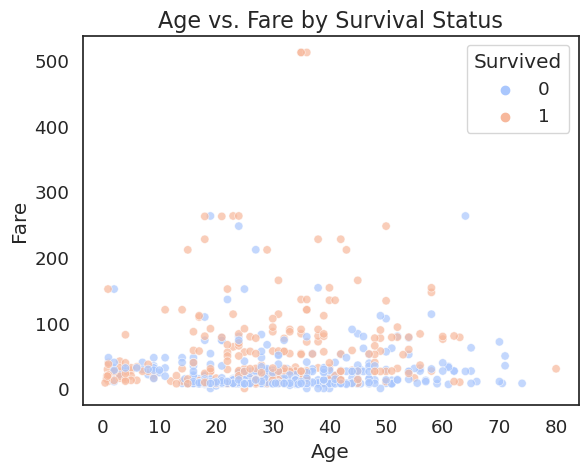

In [395]:
# The scatter plot is used to visualize the relationship between two continuous variables
# age and fare, and how it is related to survival status. The plot uses custom settings
# to make the plot more informative and easy to interpret. The 'hue' parameter is used 
# to color the points based on whether a passenger survived or not, with the 'Survived'
# column used as the label. The 'alpha' parameter is set to 0.7 to make the points slightly transparent.

# Set the style and font scale.
sns.set(style='white', font_scale=1.2)

# Create scatter plot with custom settings.
graph = sns.scatterplot(data=df_train, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)

# Add title for the scatter plot.
graph.set_title('Age vs. Fare by Survival Status', fontsize=16)

# Customize the legend.
graph.legend(title='Survived')

# Show the plot.
plt.show()

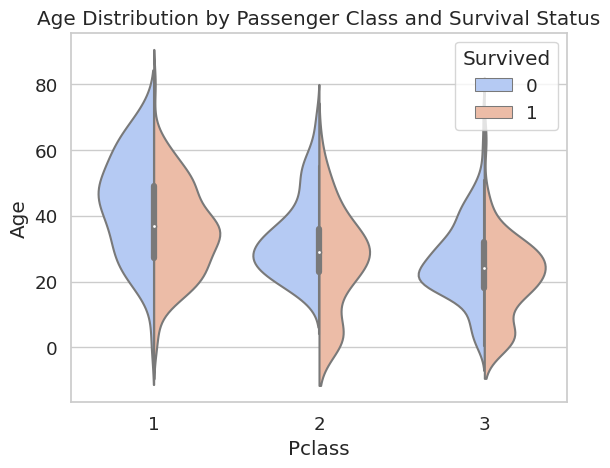

In [396]:
# This graph is used to visualize the distribution of ages for each passenger class 
# (1st, 2nd, 3rd) and survival status (survived or not survived). 
# A violin plot is used to show the distribution of ages for each category, 
# with the width of the plot indicating the density of the data at that point. 
# The split argument is set to True to split the violins for each category by survival status. 
# The hue argument is used to color the violins based on survival status. 

# Set the style and font scale.
sns.set(style='whitegrid', font_scale=1.2)

# Create a violinplot of 'Age' by 'Pclass' and 'Survived'.
ax = sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', split=True, palette='coolwarm')

# Add a title.
plt.title('Age Distribution by Passenger Class and Survival Status')

# Add a label for the y-axis.
plt.ylabel('Age')

# Add a legend.
ax.legend(title='Survived')

# Show the plot.
plt.show()

In [397]:
# List of columns to be dropped from the dataframes
columns_to_drop = ['Ticket', 'Cabin']
# Loop through the train and test dataframes
for df in (df_train, df_test):
    df.drop(columns_to_drop, axis='columns', inplace=True)

# The above line of code drops the 'Ticket' and 'Cabin' columns from both the train and test dataframes.
# The 'axis' parameter of the 'drop()' method is set to 'columns' to indicate that we want to drop columns.
# The 'inplace' parameter is set to 'True' to modify the dataframes in place, rather than returning a new copy.
# This code is useful in cases where we have columns that we don't need or that contain too 
# many missing values to be useful.
# By dropping these columns, we can simplify the data and reduce the noise in our models.

In [398]:
# Create a combined dataset called 'datasets'.
datasets = [df_train, df_test]

# Extract titles from names and create a new 'Title' column.
for dataset in datasets:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

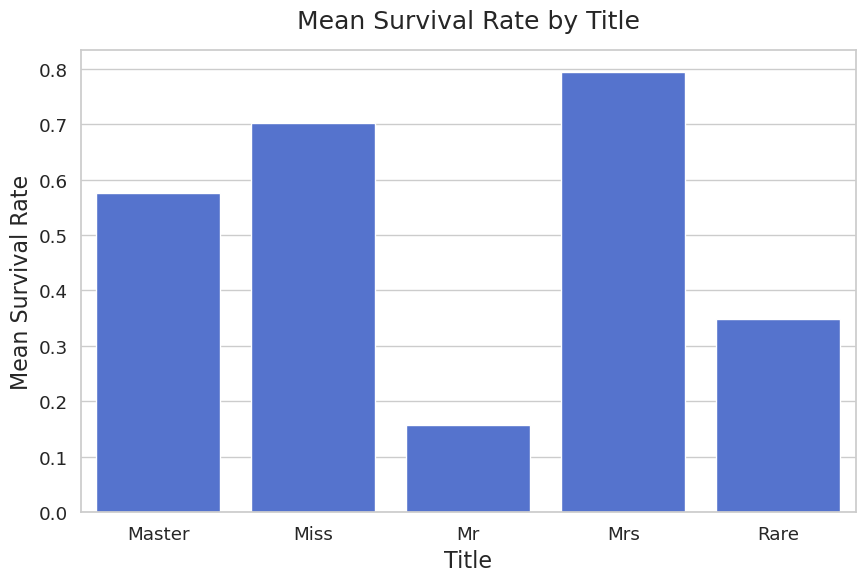

In [399]:
# Define title mapping, which will be used to hold the titles of onboard members.
title_mapping = {
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare', 'Don': 'Rare', 'Dr': 'Rare',
    'Major': 'Rare', 'Rev': 'Rare', 'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'
}

# Replace titles and create a new 'Title' column.
datasets = [df_train, df_test]
for dataset in datasets:
    dataset['Title'] = dataset['Title'].replace(title_mapping)

# Group by title and calculate the mean survival rate.
title_survival = df_train[['Title', 'Survived']].groupby('Title').mean().reset_index()

# Set style and font scale.
sns.set(style='whitegrid', font_scale=1.2)

# Create barplot to show the mean survival rate by title.
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=title_survival, color='royalblue')
plt.xlabel('Title', fontsize=16)
plt.ylabel('Mean Survival Rate', fontsize=16)
plt.title('Mean Survival Rate by Title', fontsize=18, y=1.03)
plt.show()

In [400]:
# Create a categorical to numerical association, which will be used to replace them with numerical data points.
title_mapping = {'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4, 'Mr': 5}

# Replace titles with numerical values.
for dataset in datasets:
    dataset['Title'] = dataset['Title'].map(title_mapping).fillna(0)

In [401]:
# Remove 'PassengerId' and 'Name' columns from the training data and update the DataFrame.
df_train = df_train.drop(['PassengerId','Name'],axis = 1)

# Remove 'Name' column from the test data and update the DataFrame.
df_test = df_test.drop('Name',axis = 1)

# Combine both data sets into a list.
combine = [df_train, df_test]

In [402]:
combine = [df_train, df_test]

for df in combine:
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [403]:
# The purpose of creating multiple combined datasets like [df_train, df_test] is to apply the
# same data preprocessing and feature engineering steps to both the training and test datasets.
# This ensures that the data is treated consistently and prevents overfitting to the training data
# which can result in poor performance on new, unseen data. 
datasets = [df_train, df_test]

# Function to calculate median age for a given combination of Sex and Pclass.
def median_age(data):
    return data.groupby(['Sex', 'Pclass'])['Age'].transform('median')

# Loop and iterate through the data to
# Replace missing Age values using the median age for each combination of Sex and Pclass.
for dataset in datasets:
    dataset['Age'] = dataset['Age'].fillna(dataset.groupby(['Sex', 'Pclass'])['Age'].transform('median')).astype(int)

In [404]:
for dataset in combine:
    # Create a new column based on age ranges.
    dataset['Age_Group'] = pd.cut(dataset['Age'], bins=[0, 20, 40, 60, 80], labels=[1, 2, 3, 4], include_lowest=True)
    
    # Convert Age_Group to integer.
    dataset['Age_Group'] = dataset['Age_Group'].astype(int)

In [405]:
# Find the most common value in the 'Embarked' column.
most_common_port = df_train['Embarked'].mode()[0]

# Fill missing values in 'Embarked' column with the most common port.
df_train['Embarked'] = df_train['Embarked'].fillna(most_common_port)
df_test['Embarked'] = df_test['Embarked'].fillna(most_common_port)

In [406]:
# Loop and iterate through the data to
# Replace 'Embarked' column values with numeric values.
for dataset in [df_train, df_test]:
    dataset['Embarked'].replace({'C': 1, 'Q': 2, 'S': 3}, inplace=True)

In [407]:
# Fill missing value in 'Fare' column with the median value.
median_fare = df_test['Fare'].dropna().median()
df_test['Fare'].fillna(median_fare, inplace=True)

**Split the data**

In [408]:
def split_data(df_train, df_test, test_size=0.2, random_state=42):
    # Splits data into training and evaluation sets for model training and evaluation, and removes target column from test set.
    # Split data into features (X) and target (y).
    X_train = df_train.drop('Survived', axis='columns')
    y_train = df_train['Survived']

    # Split the training set into training and evaluation sets.
    X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)

    # Drop the 'PassengerId' column from test set.
    X_test = df_test.drop('PassengerId', axis='columns')

    # Return the following values to be used in the train_and_eval_model.
    return X_train, y_train, X_eval, y_eval, X_test

In [409]:
def train_and_eval_model(model, X_train, y_train, X_eval, y_eval):
    # Train the model on the training set.
    model.fit(X_train, y_train)

    # Evaluate the model on the training set. This uses accuracy to evaluate performance.
    score = model.score(X_train, y_train)

    # Evaluate the model on the evaluation set. This uses accuracy to evaluate performance.
    eval_score = model.score(X_eval, y_eval)

    # Predict the output for the evaluation set.
    y_pred = model.predict(X_eval)

    # Return the scores and predictions.
    return score, eval_score, y_pred

 **Find the best parameters using hyperparameterization**
 
 
 **Hyperparameterization is the process of finding the best parameters for a machine learning algorithm in order to improve its performance on a given dataset. In many cases, the default parameters for an algorithm may not be optimal for a specific dataset. Grid Search is a technique used to systematically search through a range of hyperparameters to find the optimal combination.**

In [410]:
# Split the data into training and evaluation sets, and remove target column from test set.
X_train, y_train, X_eval, y_eval, X_test = split_data(df_train, df_test, test_size=0.2, random_state=42)
# Define the parameter grid for Grid Search.
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 500, 1000, 5000]
}

# Create a Logistic Regression model.
LR = LogisticRegression(penalty='l2', solver='newton-cg', C=1.0, random_state=23, max_iter=10000)

# Create a Grid Search object and fit it to the data.
grid_search = GridSearchCV(LR, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score from the Grid Search.
best_params = grid_search.best_params_

# Train and evaluate the Logistic Regression model with the best parameters.
LR = LogisticRegression(**best_params)
LR_score, LR_eval_score, LR_y_pred = train_and_eval_model(LR, X_train, y_train, X_eval, y_eval)

# Print the scores and best parameters.
print('LR Training Score = {:.2f}%'.format(LR_score*100))
print('LR Evaluation Score = {:.2f}%'.format(LR_eval_score*100))
print('Best Parameters:', best_params)
print("Best parameters:", grid_search.best_params_) 

# print the classification report for your model's predictions.
print(classification_report(y_eval, LR_y_pred))

# LR_y_pred is the predicted label and y_eval is the true label.
tn, fp, fn, tp = confusion_matrix(y_true=y_eval, y_pred=LR_y_pred).ravel()

# Print the confusion matrix.
print('Confusion Matrix:')
print('            Predicted Positive   Predicted Negative')
print('Actual Positive       {}                 {}'.format(tp, fp))
print('Actual Negative       {}                 {}'.format(fn, tn))

LR Training Score = 83.01%
LR Evaluation Score = 80.45%
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
            Predicted Positive   Predicted Negative
Actual Positive       56                 17
Actual Negative       18                 88


In [411]:
# Split the data into training and evaluation sets, and remove target column from test set.
X_train, y_train, X_eval, y_eval, X_test = split_data(df_train, df_test, test_size=0.2, random_state=42)
# Define the parameter grid to search over.
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 10000],
}

# Create a support vector machine model.
SVC_Model = SVC(random_state=42)

# Create a grid search object and fit it to the training data.
grid_search = GridSearchCV(SVC_Model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model score from the grid search.
best_params = grid_search.best_params_

# Print the best parameters and model score.
print("Best parameters:", best_params)

# Use the best parameters to create and train a new model.
SVC_Model = SVC(**best_params, random_state=42)
SVC_Model.fit(X_train, y_train)

# Evaluate the new model on the training and evaluation sets.
SVC_score = SVC_Model.score(X_train, y_train)
SVC_eval_score = SVC_Model.score(X_eval, y_eval)
SVC_y_pred = SVC_Model.predict(X_eval)

# Print the scores.
print('SVM Training Score = {:.2f}%'.format(SVC_score*100))
print('SVM Evaluation Score = {:.2f}%'.format(SVC_eval_score*100))
print("Best parameters:", grid_search.best_params_)

# print the classification report for your model's predictions.
print(classification_report(y_eval, SVC_y_pred))

# SVC_y_pred is the predicted label and y_eval is the true label.
tn, fp, fn, tp = confusion_matrix(y_true=y_eval, y_pred=SVC_y_pred).ravel()

# Print the confusion matrix.
print('Confusion Matrix:')
print('            Predicted Positive   Predicted Negative')
print('Actual Positive       {}                 {}'.format(tp, fp))
print('Actual Negative       {}                 {}'.format(fn, tn))

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 10000}
SVM Training Score = 83.15%
SVM Evaluation Score = 79.89%
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 10000}
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
            Predicted Positive   Predicted Negative
Actual Positive       53                 15
Actual Negative       21                 90


In [412]:
# Split the data into training and evaluation sets, and remove target column from test set.
X_train, y_train, X_eval, y_eval, X_test = split_data(df_train, df_test, test_size=0.2, random_state=42)
# Define the KNN classifier model.
KNN_Model = KNeighborsClassifier()

# Define the hyperparameters for the grid search.
param_grid = {'n_neighbors': [2, 4, 6, 8, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Define the grid search object.
grid_search = GridSearchCV(estimator=KNN_Model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data.
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search.
print("Best parameters: ", grid_search.best_params_)

# Use the best parameters to train and evaluate the model.
KNN_Model = KNeighborsClassifier(**grid_search.best_params_)
KNN_score, KNN_eval_score, KNN_y_pred = train_and_eval_model(KNN_Model, X_train, y_train, X_eval, y_eval)

# Print the training and evaluation scores.
print('KNN Training Score = {:.2f}%'.format(KNN_score*100))
print('KNN Evaluation Score = {:.2f}%'.format(KNN_eval_score*100))
print("Best parameters:", grid_search.best_params_)

# print the classification report for your model's predictions.
print(classification_report(y_eval, KNN_y_pred))

# KNN_y_pred is the predicted label and y_eval is the true label.
tn, fp, fn, tp = confusion_matrix(y_true=y_eval, y_pred=KNN_y_pred).ravel()

# Print the confusion matrix.
print('Confusion Matrix:')
print('            Predicted Positive   Predicted Negative')
print('Actual Positive       {}                 {}'.format(tp, fp))
print('Actual Negative       {}                 {}'.format(fn, tn))

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
KNN Training Score = 98.03%
KNN Evaluation Score = 74.30%
Best parameters: {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       105
           1       0.73      0.59      0.66        74

    accuracy                           0.74       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.74      0.74      0.74       179

Confusion Matrix:
            Predicted Positive   Predicted Negative
Actual Positive       44                 16
Actual Negative       30                 89


In [413]:
# Split the data into training and evaluation sets, and remove target column from test set.
X_train, y_train, X_eval, y_eval, X_test = split_data(df_train, df_test, test_size=0.2, random_state=42)

# Define a parameter grid to search through.
param_grid = {
'max_depth': [3, 5, 7],
'min_samples_split': [2, 3, 4],
'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier model.
DT_Model = DecisionTreeClassifier()

# Perform grid search with cross-validation to find the best hyperparameters for the model.
grid_search = GridSearchCV(DT_Model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search.
print("Best parameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the training and evaluation sets.
DT_score = grid_search.score(X_train, y_train)
DT_eval_score = grid_search.score(X_eval, y_eval)
DT_y_pred = grid_search.predict(X_eval)

# Print the training and evaluation scores for the model with the best hyperparameters.
print('DT Training Score = {:.2f}%'.format(DT_score*100))
print('DT Evaluation Score = {:.2f}%'.format(DT_eval_score*100))
print("Best parameters:", grid_search.best_params_)

# Print the classification report for your model's predictions.
print(classification_report(y_eval, DT_y_pred))

# DT_y_pred is the predicted label and y_eval is the true label.
tn, fp, fn, tp = confusion_matrix(y_true=y_eval, y_pred=DT_y_pred).ravel()

# Print the confusion matrix.
print('Confusion Matrix:')
print('            Predicted Positive   Predicted Negative')
print('Actual Positive       {}                 {}'.format(tp, fp))
print('Actual Negative       {}                 {}'.format(fn, tn))

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
DT Training Score = 83.43%
DT Evaluation Score = 81.56%
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
            Predicted Positive   Predicted Negative
Actual Positive       54                 13
Actual Negative       20                 92


In [414]:
# Split the data into training and evaluation sets, and remove target column from test set.
X_train, y_train, X_eval, y_eval, X_test = split_data(df_train, df_test, test_size=0.2, random_state=42)
# Create a RandomForestClassifier with default parameters.
rfc = RandomForestClassifier()

# Define the parameter grid to search.
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6]
}

# Create a GridSearchCV object with the RandomForestClassifier and parameter grid.
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data.
grid_search.fit(X_train, y_train)

# Print the best parameters and score.
print("Best parameters:", grid_search.best_params_)

# Train and evaluate the RandomForestClassifier with the best parameters.
best_rfc = RandomForestClassifier(**grid_search.best_params_)
best_rfc_score, best_rfc_eval_score, best_rfc_y_pred = train_and_eval_model(best_rfc, X_train, y_train, X_eval, y_eval)
print('Random Forest Training Score = {:.2f}%'.format(best_rfc_score*100))
print('Random Forest Evaluation Score = {:.2f}%'.format(best_rfc_eval_score*100))
print("Best score:", grid_search.best_score_)

# print the classification report for your model's predictions.
print(classification_report(y_eval, best_rfc_y_pred))

# best_rfc_y_pred is the predicted label and y_eval is the true label.
tn, fp, fn, tp = confusion_matrix(y_true=y_eval, y_pred=best_rfc_y_pred).ravel()

# Print the confusion matrix.
print('Confusion Matrix:')
print('            Predicted Positive   Predicted Negative')
print('Actual Positive       {}                 {}'.format(tp, fp))
print('Actual Negative       {}                 {}'.format(fn, tn))

Best parameters: {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 150}
Random Forest Training Score = 91.43%
Random Forest Evaluation Score = 83.80%
Best score: 0.8244065793361568
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
            Predicted Positive   Predicted Negative
Actual Positive       57                 12
Actual Negative       17                 93


In [415]:
# Split the data into training and evaluation sets, and remove target column from test set.
X_train, y_train, X_eval, y_eval, X_test = split_data(df_train, df_test, test_size=0.2, random_state=42)
# Define the parameter grid to search over.
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create a GradientBoostingClassifier model.
GBC_Model = GradientBoostingClassifier()

# Create a GridSearchCV object.
grid_search = GridSearchCV(estimator=GBC_Model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(X_train, y_train)

# Get the best parameters and score from the GridSearchCV object.
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", grid_search.best_params_)
# Create a new GradientBoostingClassifier model using the best parameters.
GBC_Model = GradientBoostingClassifier(**best_params)

# Train and evaluate the model.
GBC_score, GBC_eval_score, GBC_y_pred = train_and_eval_model(GBC_Model, X_train, y_train, X_eval, y_eval)
print('GBC Training Score = {:.2f}%'.format(GBC_score*100))
print('GBC Evaluation Score = {:.2f}%'.format(GBC_eval_score*100))
print("Best parameters:", grid_search.best_params_)

# Print the classification report for your model's predictions.
print(classification_report(y_eval, GBC_y_pred))

# GBC_y_pred is the predicted label and y_eval is the true label.
tn, fp, fn, tp = confusion_matrix(y_true=y_eval, y_pred=GBC_y_pred).ravel()

# Print the confusion matrix.
print('Confusion Matrix:')
print('            Predicted Positive   Predicted Negative')
print('Actual Positive       {}                 {}'.format(tp, fp))
print('Actual Negative       {}                 {}'.format(fn, tn))

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
GBC Training Score = 84.41%
GBC Evaluation Score = 81.56%
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
            Predicted Positive   Predicted Negative
Actual Positive       54                 13
Actual Negative       20                 92


**This was given from the Titanic Training code and submits the code for the leaderboard**

In [416]:
y = df_train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])
model = KNeighborsClassifier(n_neighbors =  6, weights = 'distance' , algorithm = 'auto')
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
